In [50]:
# basic mudule
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import os


In [51]:
# 데이터 로드
cp = os.getcwd()
train = pd.read_csv(os.path.join(cp,'data/train.csv')).drop(['FLAG_MOBIL','index'], axis=1) # 변수 'FLAG_MOBIL','index' 제거
test = pd.read_csv(os.path.join(cp,'data/test.csv')).drop(['FLAG_MOBIL','index'], axis=1) # 변수 'FLAG_MOBIL','index' 제거

#### train, test 변수 전처리(DAYS_BIRTH, DAYS_EMPLOYED)

In [52]:

train['DAYS_BIRTH'] = [i/-365 for i in train['DAYS_BIRTH']]

# DAYS_EMPLOYED 오류데이터
tmp = train[train['income_type']!='Pensioner']
m20 = tmp[tmp['DAYS_BIRTH'] < 30]['DAYS_EMPLOYED'].mean() # 20 대 평균 고용일수
m30 = tmp[(tmp['DAYS_BIRTH'] >= 30) & (tmp['DAYS_BIRTH'] < 40)]['DAYS_EMPLOYED'].mean() # 30 대 평균 고용일수
m40 = tmp[(tmp['DAYS_BIRTH'] >= 40) & (tmp['DAYS_BIRTH'] < 50)]['DAYS_EMPLOYED'].mean() # 40 대 평균 고용일수
m50 = tmp[(tmp['DAYS_BIRTH'] >= 50) & (tmp['DAYS_BIRTH'] < 60)]['DAYS_EMPLOYED'].mean() # 50 대 평균 고용일수
m60 = tmp[tmp['DAYS_BIRTH'] >= 60]['DAYS_EMPLOYED'].mean() # 60 대 평균 고용일수

train.loc[(train.income_type == 'Pensioner')&(train.DAYS_BIRTH < 30), 'DAYS_EMPLOYED'] = m20
train.loc[(train.income_type == 'Pensioner')&(train.DAYS_BIRTH >= 30) & (train.DAYS_BIRTH < 40), 'DAYS_EMPLOYED'] = m30
train.loc[(train.income_type == 'Pensioner')&(train.DAYS_BIRTH >= 40) & (train.DAYS_BIRTH < 50), 'DAYS_EMPLOYED'] = m40
train.loc[(train.income_type == 'Pensioner')&(train.DAYS_BIRTH >= 50) & (train.DAYS_BIRTH < 60), 'DAYS_EMPLOYED'] = m50
train.loc[(train.income_type == 'Pensioner')&(train.DAYS_BIRTH >= 60), 'DAYS_EMPLOYED'] = m60

train['DAYS_EMPLOYED'] = [i/-365 for i in train['DAYS_EMPLOYED']]

In [75]:
# 변수 전처리: DAYS_BIRTH, DAYS_EMPLOYED  
test['DAYS_BIRTH'] = [i/-365 for i in test['DAYS_BIRTH']]

# DAYS_EMPLOYED 오류데이터
tmp = test[test['income_type']!='Pensioner']
m20 = tmp[tmp['DAYS_BIRTH'] < 30]['DAYS_EMPLOYED'].mean() # 20 대 평균 고용일수
m30 = tmp[(tmp['DAYS_BIRTH'] >= 30) & (tmp['DAYS_BIRTH'] < 40)]['DAYS_EMPLOYED'].mean() # 30 대 평균 고용일수
m40 = tmp[(tmp['DAYS_BIRTH'] >= 40) & (tmp['DAYS_BIRTH'] < 50)]['DAYS_EMPLOYED'].mean() # 40 대 평균 고용일수
m50 = tmp[(tmp['DAYS_BIRTH'] >= 50) & (tmp['DAYS_BIRTH'] < 60)]['DAYS_EMPLOYED'].mean() # 50 대 평균 고용일수
m60 = tmp[tmp['DAYS_BIRTH'] >= 60]['DAYS_EMPLOYED'].mean() # 60 대 평균 고용일수

test.loc[(test.income_type == 'Pensioner')&(test.DAYS_BIRTH < 30), 'DAYS_EMPLOYED'] = m20
test.loc[(test.income_type == 'Pensioner')&(test.DAYS_BIRTH >= 30) & (test.DAYS_BIRTH < 40), 'DAYS_EMPLOYED'] = m30
test.loc[(test.income_type == 'Pensioner')&(test.DAYS_BIRTH >= 40) & (test.DAYS_BIRTH < 50), 'DAYS_EMPLOYED'] = m40
test.loc[(test.income_type == 'Pensioner')&(test.DAYS_BIRTH >= 50) & (test.DAYS_BIRTH < 60), 'DAYS_EMPLOYED'] = m50
test.loc[(test.income_type == 'Pensioner')&(test.DAYS_BIRTH >= 60), 'DAYS_EMPLOYED'] = m60

test['DAYS_EMPLOYED'] = [i/-365 for i in test['DAYS_EMPLOYED']]

#### train, test 변수 전처리(occyp_type)

In [115]:
train['occyp_type'] = [i if isinstance(i,str) else 'nojob' for i in train['occyp_type']]

In [116]:
test['occyp_type'] = [i if isinstance(i,str) else 'nojob' for i in test['occyp_type']]

#### train, test 변수 전처리(begin_month)

In [167]:
train['begin_month'] = [i * -1 for i in train['begin_month']]

In [168]:
test['begin_month'] = [i * -1 for i in test['begin_month']]

##  label 별로 변수 탐색

In [169]:
first = train[train['credit']==0]
second = train[train['credit']==1]
third = train[train['credit']==2]

<BarContainer object of 3 artists>

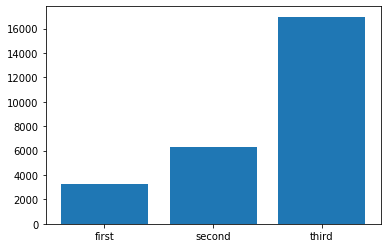

In [40]:
plt.bar(x=['first','second','third'], height=[first.shape[0], second.shape[0], third.shape[0]])

-> 신용도는 위와 같은 분포를 보임. 신용도가 높으신 분들이 확실히 적음.

# gender

#### train set

<BarContainer object of 2 artists>

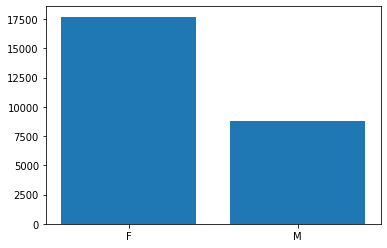

In [15]:
plt.bar(height = Counter(train['gender']).values(), x = Counter(train['gender']).keys())

-> 여자가 더 많음.

#### label 별로 확인

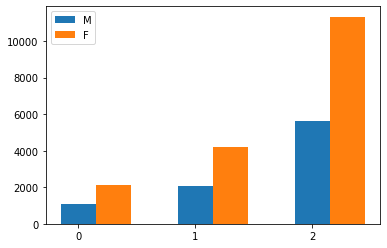

In [68]:
data1 = Counter(first['gender'])['M'], Counter(second['gender'])['M'], Counter(third['gender'])['M']
data2 = Counter(first['gender'])['F'], Counter(second['gender'])['F'], Counter(third['gender'])['F']
width = 0.3
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='M')
plt.bar(length+ width, data2, width=width, label='F')
plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

#### test set

<BarContainer object of 2 artists>

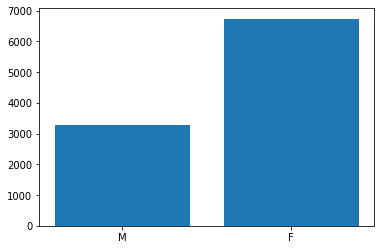

In [41]:
plt.bar(height = Counter(test['gender']).values(), x = Counter(test['gender']).keys())

-> 마찬가지로 여자가 더 많음

# car

#### train set

<BarContainer object of 2 artists>

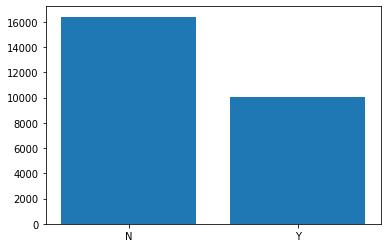

In [71]:
plt.bar(height = Counter(train['car']).values(), x = Counter(train['car']).keys())

-> 차량이 없는 경우가 더 많음.

#### label 별로 확인

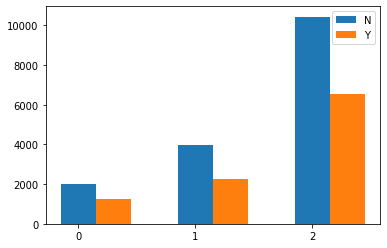

In [73]:
data1 = Counter(first['car'])['N'], Counter(second['car'])['N'], Counter(third['car'])['N']
data2 = Counter(first['car'])['Y'], Counter(second['car'])['Y'], Counter(third['car'])['Y']
width = 0.3
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='N')
plt.bar(length+ width, data2, width=width, label='Y')
plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> 전체적으로 봤을 때 대비해서 골고루 분포되어 있음

#### test set

<BarContainer object of 2 artists>

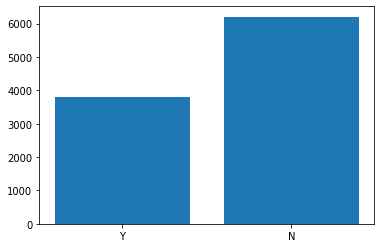

In [74]:
plt.bar(height = Counter(test['car']).values(), x = Counter(test['car']).keys())

-> 마찬가지로 차량이 없는 경우가 더 많음.

# reality

#### train set

<BarContainer object of 2 artists>

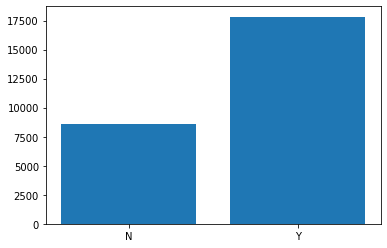

In [75]:
plt.bar(height = Counter(train['reality']).values(), x = Counter(train['reality']).keys())

-> 부동산 소유한 사람이 더 많음.

#### label 별로 확인

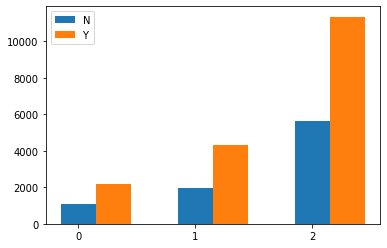

In [76]:
data1 = Counter(first['reality'])['N'], Counter(second['reality'])['N'], Counter(third['reality'])['N']
data2 = Counter(first['reality'])['Y'], Counter(second['reality'])['Y'], Counter(third['reality'])['Y']
width = 0.3
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='N')
plt.bar(length+ width, data2, width=width, label='Y')
plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> 라벨 별로도 부동산을 소유한 사람이 더 많음.

#### test set

<BarContainer object of 2 artists>

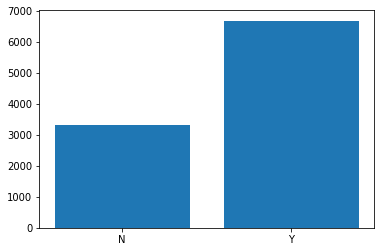

In [77]:
plt.bar(height = Counter(test['reality']).values(), x = Counter(test['reality']).keys())

-> 마찬가지로 부동산을 소유한 사람이 더 많음.

# child_num

#### train set

<BarContainer object of 9 artists>

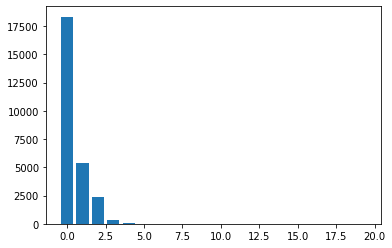

In [82]:
plt.bar(height = Counter(train['child_num']).values(), x = Counter(train['child_num']).keys())

In [87]:
Counter(train['child_num'])

Counter({0: 18340, 1: 5386, 2: 2362, 3: 306, 4: 47, 5: 10, 14: 3, 19: 1, 7: 2})

-> 자녀가 없는 경우가 대다수이며 1, 2명 정도가 그다음으로 많음.

#### label 별로 확인

<BarContainer object of 6 artists>

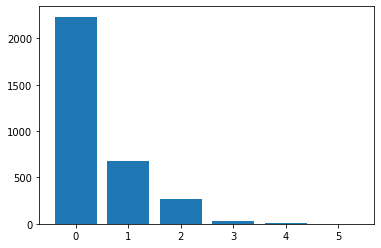

In [84]:
plt.bar(height = Counter(first['child_num']).values(), x = Counter(first['child_num']).keys())

<BarContainer object of 6 artists>

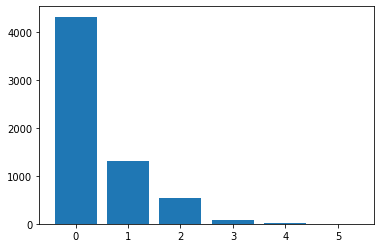

In [85]:
plt.bar(height = Counter(second['child_num']).values(), x = Counter(second['child_num']).keys())

<BarContainer object of 9 artists>

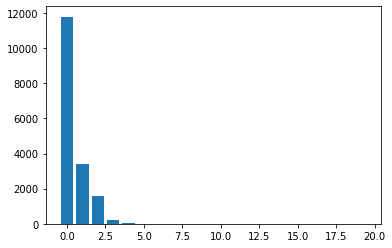

In [86]:
plt.bar(height = Counter(third['child_num']).values(), x = Counter(third['child_num']).keys())

-> 라벨별로도 자녀가 0,1,2 명인 경우가 차례로 많음.

In [83]:
Counter(first['child_num'])

Counter({0: 2233, 1: 682, 2: 268, 4: 8, 3: 29, 5: 2})

#### test set

<BarContainer object of 6 artists>

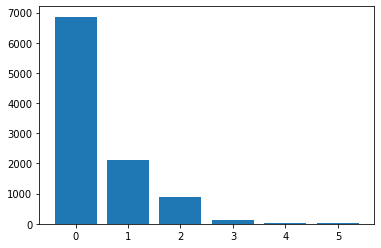

In [88]:
plt.bar(height = Counter(test['child_num']).values(), x = Counter(test['child_num']).keys())

-> 마찬가지로 train set 과 비슷한 양상을 보임

# income_total

#### train set

In [123]:
pd.DataFrame(train[['income_total']].describe()['income_total'].round(2))

,income_total
count,26457.00
mean,187306.52
std,101878.37
min,27000.00
25%,121500.00
50%,157500.00
75%,225000.00
max,1575000.00


#### label 별로 확인

In [124]:
tmp=[]
idx = first[['income_total']].describe().index
tmp.append(list(first[['income_total']].describe()['income_total'].round(2)))
tmp.append(list(second[['income_total']].describe()['income_total'].round(2)))
tmp.append(list(third[['income_total']].describe()['income_total'].round(2)))
tmp_df = pd.DataFrame(tmp).T
tmp_df.index = idx
tmp_df

,0,1,2
count,3222.00,6267.00,16968.00
mean,190807.58,181122.70,188925.67
std,102139.55,92548.26,104981.73
min,29250.00,27000.00,27000.00
25%,126000.00,117000.00,121500.00
50%,162000.00,157500.00,157500.00
75%,225000.00,225000.00,225000.00
max,945000.00,1125000.00,1575000.00


-> 라벨이 0인 경우)
    - 평균이 가장 큼.
    - 중앙값도 가장 큼.
    - min 값은 가장 크고, max 값은 가장 작음.

-> 라벨이 1인 경우)
    - 평균이 가장 작음.
    - 편차가 가장 적음.

-> 라벨이 2인 경우)
    - 편차가 큰 편임.
    - max 값이 가장 큼.
    
**=> 군집을 나누기에는 라벨별로 차이가 크지 않음.**

#### test set

In [125]:
pd.DataFrame(test[['income_total']].describe()['income_total'].round(2))

,income_total
count,10000.00
mean,185043.32
std,101539.79
min,27000.00
25%,121500.00
50%,157500.00
75%,225000.00
max,1575000.00


-> train set 과 비슷한 값을 띄는 양상을 보임.

# income_type

#### train set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

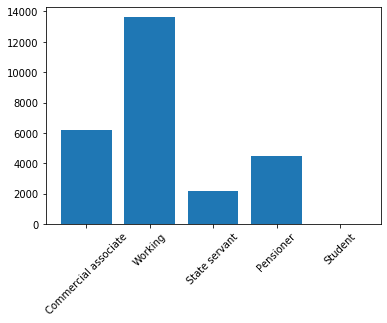

In [129]:
plt.bar(height = Counter(train['income_type']).values(), x = Counter(train['income_type']).keys())
plt.xticks(rotation=45)

#### label 별로 확인

In [132]:
Counter(train['income_type'])

Counter({'Commercial associate': 6202,
         'Working': 13645,
         'State servant': 2154,
         'Pensioner': 4449,
         'Student': 7})

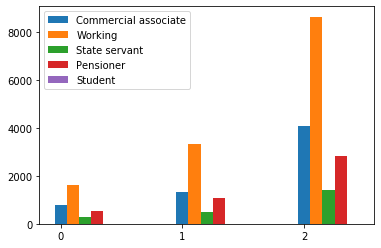

In [141]:
data1 = Counter(first['income_type'])['Commercial associate'], Counter(second['income_type'])['Commercial associate'], Counter(third['income_type'])['Commercial associate']
data2 = Counter(first['income_type'])['Working'], Counter(second['income_type'])['Working'], Counter(third['income_type'])['Working']
data3 = Counter(first['income_type'])['State servant'], Counter(second['income_type'])['State servant'], Counter(third['income_type'])['State servant']
data4 = Counter(first['income_type'])['Pensioner'], Counter(second['income_type'])['Pensioner'], Counter(third['income_type'])['Pensioner']
data5 = Counter(first['income_type'])['Student'], Counter(second['income_type'])['Student'], Counter(third['income_type'])['Student']

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='Commercial associate')
plt.bar(length+ width, data2, width=width, label='Working')
plt.bar(length+ width+ width, data3, width=width, label='State servant')
plt.bar(length+ width+ width+ width, data4, width=width, label='Pensioner')
plt.bar(length+ width+ width+ width+ width, data5, width=width, label='Student')


plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> label 별로 비슷한 양상을 보임.

#### test set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

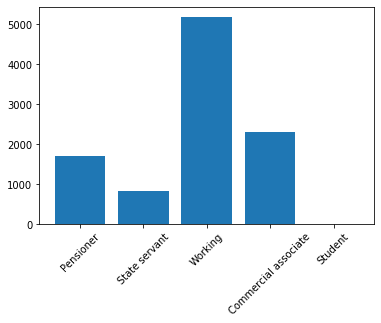

In [142]:
plt.bar(height = Counter(test['income_type']).values(), x = Counter(test['income_type']).keys())
plt.xticks(rotation=45)

-> train set과 비슷한 양상을 보이고 있음.

# edu_type

#### train set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

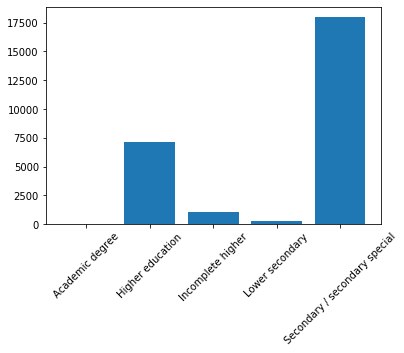

In [147]:
plt.bar(height = Counter(sorted(train['edu_type'])).values(), x = Counter(sorted(train['edu_type'])).keys())
plt.xticks(rotation=45)

In [149]:
Counter(sorted(train['edu_type'])).keys()

dict_keys(['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'])

#### label 별로 확인

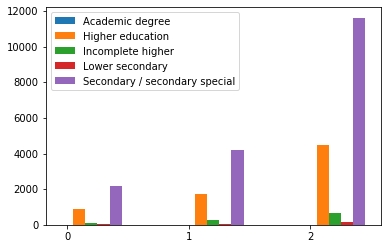

In [158]:
data1 = Counter(first['edu_type'])['Academic degree'], Counter(second['edu_type'])['Academic degree'], Counter(third['edu_type'])['Academic degree']
data2 = Counter(first['edu_type'])['Higher education'], Counter(second['edu_type'])['Higher education'], Counter(third['edu_type'])['Higher education']
data3 = Counter(first['edu_type'])['Incomplete higher'], Counter(second['edu_type'])['Incomplete higher'], Counter(third['edu_type'])['Incomplete higher']
data4 = Counter(first['edu_type'])['Lower secondary'], Counter(second['edu_type'])['Lower secondary'], Counter(third['edu_type'])['Lower secondary']
data5 = Counter(first['edu_type'])['Secondary / secondary special'], Counter(second['edu_type'])['Secondary / secondary special'], Counter(third['edu_type'])['Secondary / secondary special']

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='Academic degree')
plt.bar(length+ width, data2, width=width, label='Higher education')
plt.bar(length+ width+ width, data3, width=width, label='Incomplete higher')
plt.bar(length+ width+ width+ width, data4, width=width, label='Lower secondary')
plt.bar(length+ width+ width+ width+ width, data5, width=width, label='Secondary / secondary special')


plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> label 별로 유사한 양상을 띄고 있다. 순서도 모두 동일하게 분포하고 있다.

#### test set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

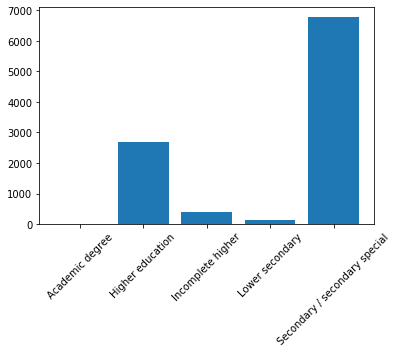

In [148]:
plt.bar(height = Counter(sorted(test['edu_type'])).values(), x = Counter(sorted(test['edu_type'])).keys())
plt.xticks(rotation=45)

-> train set과 변수의 순서가 동일하게 분포한다.

# family_type

#### train set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

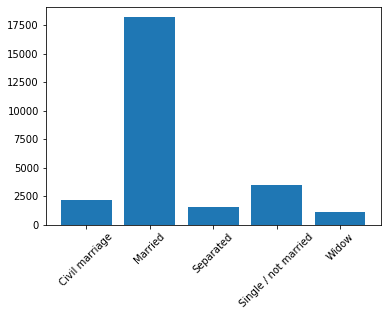

In [160]:
plt.bar(height = Counter(sorted(train['family_type'])).values(), x = Counter(sorted(train['family_type'])).keys())
plt.xticks(rotation=45)

-> Married 가 가장 많고 나머지는 비슷비슷한 분포를 띔.

#### label 별로 확인.

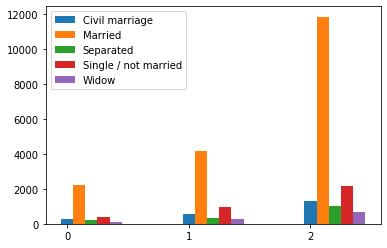

In [162]:
data1 = Counter(first['family_type'])['Civil marriage'], Counter(second['family_type'])['Civil marriage'], Counter(third['family_type'])['Civil marriage']
data2 = Counter(first['family_type'])['Married'], Counter(second['family_type'])['Married'], Counter(third['family_type'])['Married']
data3 = Counter(first['family_type'])['Separated'], Counter(second['family_type'])['Separated'], Counter(third['family_type'])['Separated']
data4 = Counter(first['family_type'])['Single / not married'], Counter(second['family_type'])['Single / not married'], Counter(third['family_type'])['Single / not married']
data5 = Counter(first['family_type'])['Widow'], Counter(second['family_type'])['Widow'], Counter(third['family_type'])['Widow']

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='Civil marriage')
plt.bar(length+ width, data2, width=width, label='Married')
plt.bar(length+ width+ width, data3, width=width, label='Separated')
plt.bar(length+ width+ width+ width, data4, width=width, label='Single / not married')
plt.bar(length+ width+ width+ width+ width, data5, width=width, label='Widow')


plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> 모든 라벨에 대하여 비슷한 양상을 보이고 있다.

#### test set

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

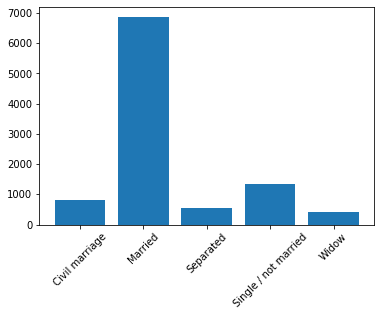

In [161]:
plt.bar(height = Counter(sorted(test['family_type'])).values(), x = Counter(sorted(test['family_type'])).keys())
plt.xticks(rotation=45)

-> train 과 순서 동일하게 비슷한 분포를 띔.

# house_type

#### train set

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

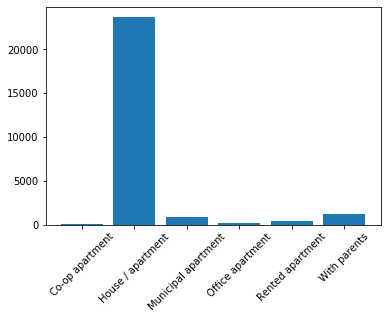

In [163]:
plt.bar(height = Counter(sorted(train['house_type'])).values(), x = Counter(sorted(train['house_type'])).keys())
plt.xticks(rotation=45)

-> 일반 집/아파트가 대다수인 것을 확인.

In [166]:
Counter(sorted(train['house_type'])).keys()

dict_keys(['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents'])

#### label 별로 확인

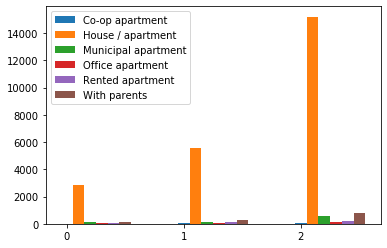

In [168]:
data1 = Counter(first['house_type'])['Co-op apartment'], Counter(second['house_type'])['Co-op apartment'], Counter(third['house_type'])['Co-op apartment']
data2 = Counter(first['house_type'])['House / apartment'], Counter(second['house_type'])['House / apartment'], Counter(third['house_type'])['House / apartment']
data3 = Counter(first['house_type'])['Municipal apartment'], Counter(second['house_type'])['Municipal apartment'], Counter(third['house_type'])['Municipal apartment']
data4 = Counter(first['house_type'])['Office apartment'], Counter(second['house_type'])['Office apartment'], Counter(third['house_type'])['Office apartment']
data5 = Counter(first['house_type'])['Rented apartment'], Counter(second['house_type'])['Rented apartment'], Counter(third['house_type'])['Rented apartment']
data6 = Counter(first['house_type'])['With parents'], Counter(second['house_type'])['With parents'], Counter(third['house_type'])['With parents']

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label='Co-op apartment')
plt.bar(length+ width, data2, width=width, label='House / apartment')
plt.bar(length+ width+ width, data3, width=width, label='Municipal apartment')
plt.bar(length+ width+ width+ width, data4, width=width, label='Office apartment')
plt.bar(length+ width+ width+ width+ width, data5, width=width, label='Rented apartment')
plt.bar(length+ width+ width+ width+ width+ width, data6, width=width, label='With parents')


plt.legend()
plt.xticks(length, ['0', '1', '2'])
plt.show()

-> label 별로 분포가 유사한 양상을 보임.

#### test set

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

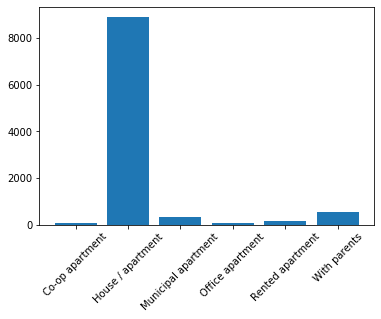

In [164]:
plt.bar(height = Counter(sorted(test['house_type'])).values(), x = Counter(sorted(test['house_type'])).keys())
plt.xticks(rotation=45)

-> train set과 유사한 분포를 띔.

# DAYS_BIRTH

#### train set

In [194]:
pd.DataFrame(train[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2))

,DAYS_BIRTH
count,26457.00
mean,43.72
std,11.51
min,21.11
25%,34.10
50%,42.59
75%,53.24
max,68.91


-> 평균 43 세 최소 21살에서 최고 68세로 분포. 

#### label 별로 확인

In [195]:
tmp=[]
idx = first[['DAYS_BIRTH']].describe().index
tmp.append(list(first[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp.append(list(second[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp.append(list(third[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp_df = pd.DataFrame(tmp).T
tmp_df.index = idx
tmp_df

,0,1,2
count,3222.00,6267.00,16968.00
mean,43.48,43.11,43.99
std,11.32,11.87,11.40
min,21.25,21.16,21.11
25%,34.47,32.92,34.40
50%,41.93,41.91,43.07
75%,52.53,53.09,53.39
max,68.88,68.41,68.91


-> 모든 라벨에 대한 나이의 분포가 거의 유사하다. 이쯤 되면 라벨 별로 두드러지는 특징을 찾는게 힘들다는 생각이 들 정도.

#### test set

In [196]:
pd.DataFrame(test[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2))

,DAYS_BIRTH
count,10000.00
mean,-16020.47
std,4197.67
min,-25152.00
25%,-19483.25
50%,-15606.00
75%,-12539.00
max,-7489.00


-> train set 과 거의 유사한 양상을 보임.

# DAYS_EMPLOYED

** 연금받으시는 분들 이상값을 평균 값으로 들어가게 하였음.

#### train set

In [78]:
pd.DataFrame(train[['DAYS_EMPLOYED']].describe()['DAYS_EMPLOYED'].round(2))

,DAYS_EMPLOYED
count,26457.00
mean,7.98
std,6.17
min,0.05
25%,3.18
50%,6.85
75%,11.04
max,43.05


-> 평균 고용일수 약 8년, 중앙값으로는 6.85년. 편차가 6년정도로 꽤 편차가 크다.

#### label 별로 확인

In [81]:
tmp=[]
idx = first[['DAYS_BIRTH']].describe().index
tmp.append(list(first[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp.append(list(second[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp.append(list(third[['DAYS_BIRTH']].describe()['DAYS_BIRTH'].round(2)))
tmp_df = pd.DataFrame(tmp).T
tmp_df.index = idx
tmp_df

,0,1,2
count,3222.00,6267.00,16968.00
mean,43.48,43.11,43.99
std,11.32,11.87,11.40
min,21.25,21.16,21.11
25%,34.47,32.92,34.40
50%,41.93,41.91,43.07
75%,52.53,53.09,53.39
max,68.88,68.41,68.91


-> label 별로는 큰 차이를 보이지 않고 있다. 

#### test set

In [82]:
pd.DataFrame(test[['DAYS_EMPLOYED']].describe()['DAYS_EMPLOYED'].round(2))

,DAYS_EMPLOYED
count,10000.00
mean,7.91
std,6.05
min,0.05
25%,3.27
50%,6.94
75%,11.11
max,42.91


-> train set 과 거의 유사한 양상을 보이고 있다.

# FLAG_MOBIL

#### -> 이 변수는 케이스 전부 다 가지고 있어서 애초에 데이터 로드할 때부터 제외하였음.

# work_phone

#### train set

<BarContainer object of 2 artists>

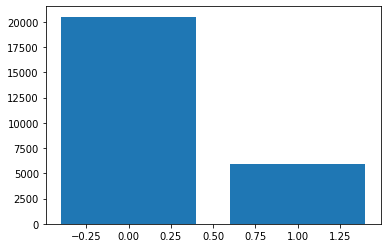

In [87]:
plt.bar(height = Counter(sorted(train['work_phone'])).values(), x = Counter(sorted(train['work_phone'])).keys())

-> 0과 1로 나뉜 이진 변수인데, 없는 사람이 더 많은 것을 알 수 있다.

#### label 별로 확인

In [88]:
Counter(first['work_phone'])

Counter({0: 2493, 1: 729})

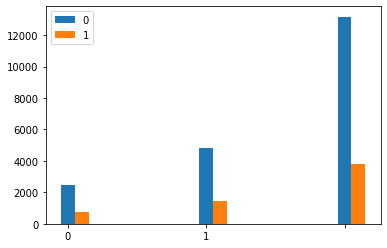

In [89]:
data1 = Counter(first['work_phone'])[0], Counter(second['work_phone'])[0], Counter(third['work_phone'])[0]
data2 = Counter(first['work_phone'])[1], Counter(second['work_phone'])[1], Counter(third['work_phone'])[1]

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label=0)
plt.bar(length+ width, data2, width=width, label=1)

plt.legend()
plt.xticks(length, ['0', '1'])
plt.show()

-> 라벨 별 분포도 업무용 전화가 없는 케이스가 더 많이 존재한다.

#### test set

<BarContainer object of 2 artists>

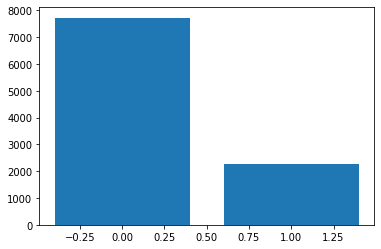

In [90]:
plt.bar(height = Counter(sorted(test['work_phone'])).values(), x = Counter(sorted(test['work_phone'])).keys())

-> train set과 마찬가지로 업무용 전화가 없는 경우가 더 많은 것을 알 수 있다.

# email

####  train set

<BarContainer object of 2 artists>

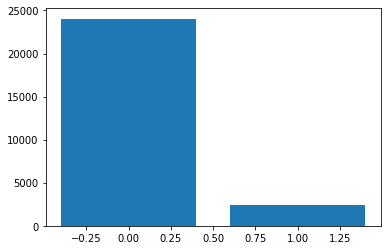

In [91]:
plt.bar(height = Counter(sorted(train['email'])).values(), x = Counter(sorted(train['email'])).keys())

#### label 별로 확인

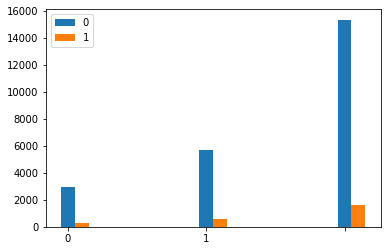

In [93]:
data1 = Counter(first['email'])[0], Counter(second['email'])[0], Counter(third['email'])[0]
data2 = Counter(first['email'])[1], Counter(second['email'])[1], Counter(third['email'])[1]

width = 0.1
length = np.arange(len(data1))
plt.bar(length, data1, width=width, label=0)
plt.bar(length+ width, data2, width=width, label=1)

plt.legend()
plt.xticks(length, ['0', '1'])
plt.show()

-> 라벨별로 이메일 소유 여부는 전부다 비슷하게 없는 사람들이 많다.

#### test set

<BarContainer object of 2 artists>

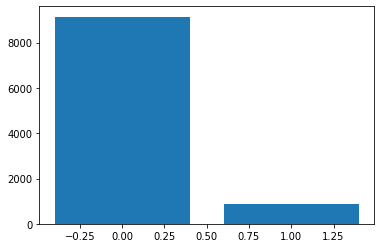

In [92]:
plt.bar(height = Counter(sorted(test['email'])).values(), x = Counter(sorted(test['email'])).keys())

# occyp_type

#### train set

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

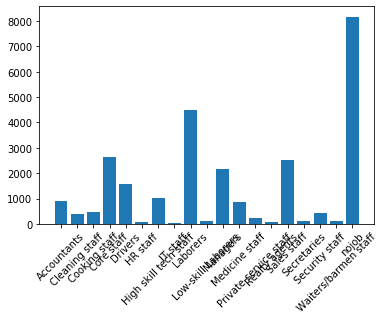

In [132]:
plt.bar(height = Counter(sorted(train['occyp_type'])).values(), x = Counter(sorted(train['occyp_type'])).keys())
plt.xticks(rotation=45)

In [133]:
Counter(train['occyp_type'])

Counter({'nojob': 8171,
         'Laborers': 4512,
         'Managers': 2167,
         'Sales staff': 2539,
         'High skill tech staff': 1040,
         'Core staff': 2646,
         'Drivers': 1575,
         'Medicine staff': 864,
         'Accountants': 902,
         'Realty agents': 63,
         'Security staff': 424,
         'Cleaning staff': 403,
         'Private service staff': 243,
         'Cooking staff': 457,
         'Secretaries': 97,
         'HR staff': 62,
         'IT staff': 41,
         'Low-skill Laborers': 127,
         'Waiters/barmen staff': 124})

-> 직업이 없는 사람이 가장 많다... :( 

#### label 별로 확인

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

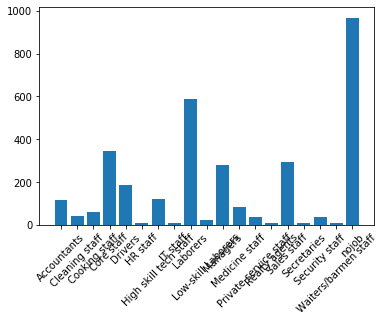

In [149]:
plt.bar(x=Counter(sorted(first['occyp_type'])).keys(), height=Counter(sorted(first['occyp_type'])).values())
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

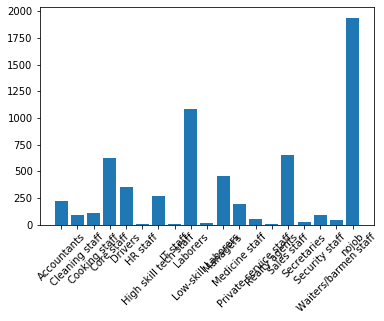

In [150]:
plt.bar(x=Counter(sorted(second['occyp_type'])).keys(), height=Counter(sorted(second['occyp_type'])).values())
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

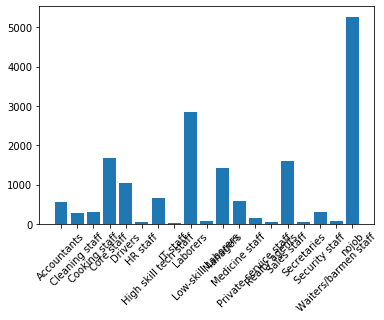

In [151]:
plt.bar(x=Counter(sorted(third['occyp_type'])).keys(), height=Counter(sorted(third['occyp_type'])).values())
plt.xticks(rotation=45)

-> 라벨별로 차이없는 것을 알 수 있다.

#### test set

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

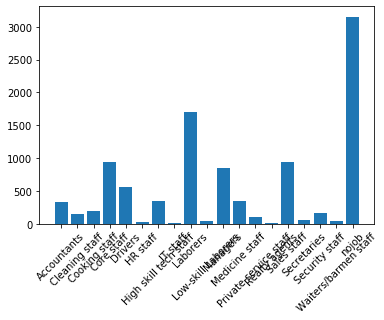

In [152]:
plt.bar(height = Counter(sorted(test['occyp_type'])).values(), x = Counter(sorted(test['occyp_type'])).keys())
plt.xticks(rotation=45)

In [154]:
Counter(sorted(test['occyp_type']))

Counter({'Accountants': 339,
         'Cleaning staff': 148,
         'Cooking staff': 198,
         'Core staff': 945,
         'Drivers': 563,
         'HR staff': 23,
         'High skill tech staff': 343,
         'IT staff': 19,
         'Laborers': 1699,
         'Low-skill Laborers': 48,
         'Managers': 845,
         'Medicine staff': 343,
         'Private service staff': 101,
         'Realty agents': 16,
         'Sales staff': 946,
         'Secretaries': 54,
         'Security staff': 168,
         'Waiters/barmen staff': 50,
         'nojob': 3152})

-> train set과 분포가 거의 동일한 것을 알 수 있음.

# family_size

#### train set

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text xticklabel objects>)

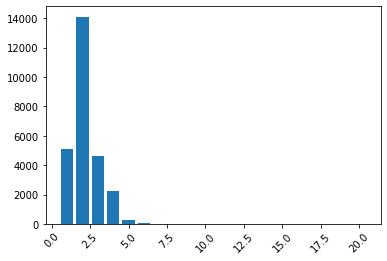

In [155]:
plt.bar(height = Counter(sorted(train['family_size'])).values(), x = Counter(sorted(train['family_size'])).keys())
plt.xticks(rotation=45)

#### label 별로 확인

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

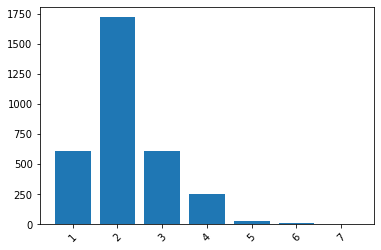

In [156]:
plt.bar(height = Counter(sorted(first['family_size'])).values(), x = Counter(sorted(first['family_size'])).keys())
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

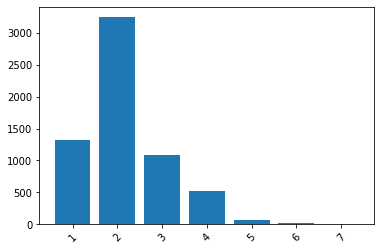

In [157]:
plt.bar(height = Counter(sorted(second['family_size'])).values(), x = Counter(sorted(second['family_size'])).keys())
plt.xticks(rotation=45)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 11 Text xticklabel objects>)

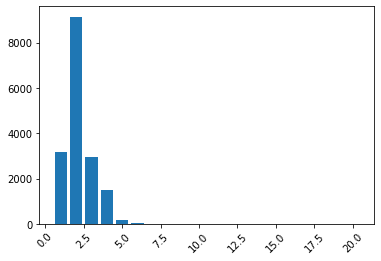

In [158]:
plt.bar(height = Counter(sorted(third['family_size'])).values(), x = Counter(sorted(third['family_size'])).keys())
plt.xticks(rotation=45)

-> 라벨별로 차이는 없고 가족이 2명인경우가 가장 많고 1,3 명이 그 뒤를 잇는다.

#### test set

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

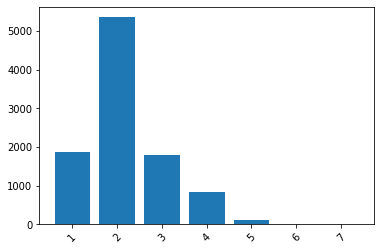

In [159]:
plt.bar(height = Counter(sorted(test['family_size'])).values(), x = Counter(sorted(test['family_size'])).keys())
plt.xticks(rotation=45)

-> train set 과 유사한 양상을 보임.

# begin_month

#### train set

In [172]:
pd.DataFrame(train[['begin_month']].describe()['begin_month'].round(2))

,begin_month
count,26457.00
mean,26.12
std,16.56
min,-0.00
25%,12.00
50%,24.00
75%,39.00
max,60.00


-> 신용카드 발급한 지 평균 26개월 정도 지났고, 편차는 16개월로 큰 편인 듯 보인다.

#### label 별로 확인

In [173]:
tmp=[]
idx = first[['begin_month']].describe().index
tmp.append(list(first[['begin_month']].describe()['begin_month'].round(2)))
tmp.append(list(second[['begin_month']].describe()['begin_month'].round(2)))
tmp.append(list(third[['begin_month']].describe()['begin_month'].round(2)))
tmp_df = pd.DataFrame(tmp).T
tmp_df.index = idx
tmp_df

,0,1,2
count,3222.00,6267.00,16968.00
mean,23.99,21.08,28.39
std,16.89,17.34,15.72
min,-0.00,-0.00,2.00
25%,9.00,5.00,15.00
50%,22.00,17.00,27.00
75%,37.00,35.00,41.00
max,60.00,60.00,60.00


-> 라벨별로 차이가 다른 변수에 비해 상대적으로 잘 드러난다.
  label이 2인경우가 평균, 중앙값으로보면 가장 오래됐고, 편차도 적은 편이다.

#### test set

In [174]:
pd.DataFrame(test[['begin_month']].describe()['begin_month'].round(2))

,begin_month
count,10000.00
mean,26.27
std,16.35
min,-0.00
25%,12.00
50%,25.00
75%,39.00
max,60.00


-> train set 과 유사한 양상을 띈다.

# credit

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 9 Text xticklabel objects>)

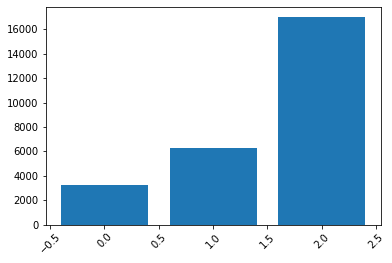

In [178]:
plt.bar(height = Counter(sorted(train['credit'])).values(), x = Counter(sorted(train['credit'])).keys())
plt.xticks(rotation=45)

-> 신용도가 가장 좋은 0 이 가장 적고, 이어서 1, 2가 빈도가 차례로 많게 나타났다.

### EDA1 에서는 기본적으로 빈도만 보고, label에 따라서 빈도가 달라지는지 확인해 보았으나, 생각보다 label 별로 차이가 없었다. 단순히 하나의 변수와 label 간의 관계를 보면, label 별로 다른 점을 찾기 힘들 것으로 보인다.

### 이상치 처리나 변수 재설정 혹은 파생변수를 생성하여 분류 성능을 더 올릴 수 있는 방법을 찾아봐야 한다고 생각한다.